In [ ]:
import tensorflow as tf
import numpy as np 

input1 = tf.constant(1.0, shape=[2, 3])
input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2,3)))
output = tf.add(input1, input2)

print('input1: {}'.format(input1))
print('input2: {}'.format(input2))
print('output: {}'.format(output))

input1: [[1. 1. 1.]
 [1. 1. 1.]]
input2: [[1. 2. 3.]
 [4. 5. 6.]]
output: [[2. 3. 4.]
 [5. 6. 7.]]


In [ ]:
!pip3 install torch torchvision

import torch
torch.__version__

'1.7.0+cu101'

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} 

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [ ]:
!ls
!mkdir -p drive
!ls
!google-drive-ocamlfuse drive
!ls drive/withCoLab

adc.json  drive  sample_data
adc.json  drive  sample_data
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
LearnPytorch.ipynb


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


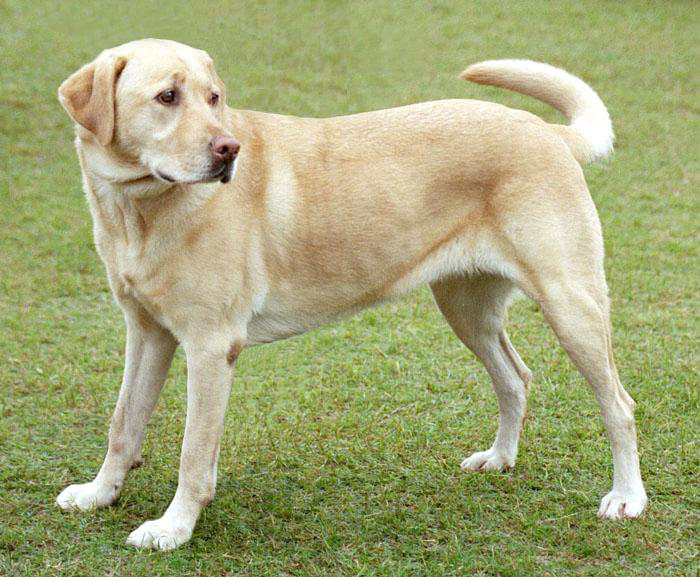

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from PIL import Image
img = Image.open('/content/gdrive/My Drive/withCoLab/dataset/dog.jpg')
img

In [ ]:
from torchvision import models
import torch
dir(models)

# 1. load pre-trained models
alexnet = models.alexnet(pretrained=True)
print(alexnet)

# 2. specify image transformations
from torchvision import transforms
transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225]
                                )
]) 

#3. Load the input image and pre-process it
from google.colab import drive
drive.mount('/content/gdrive')

from PIL import Image
path = '/content/gdrive/My Drive/withCoLab/dataset/'
img = Image.open(path+'dog.jpg')

img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

#4. module inference
alexnet.eval() #set model in evaluation mode
out = alexnet(batch_t)
print(out.shape)  #check 1000 class

with open(path+'imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

#5. get maximum score in the output score
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(classes[index[0]], percentage[index[0]].item())  

#6. desend high probable results
_, indices = torch.sort(out, descending = True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

[('208, Labrador_retriever', 41.58518600463867),
 ('207, golden_retriever', 16.59165382385254),
 ('176, Saluki', 16.28687286376953),
 ('172, whippet', 2.853912115097046),
 ('173, Ibizan_hound', 2.3924756050109863)]

In [ ]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [ ]:
#7. test with resnet model
#load the model
resnet = models.wide_resnet101_2(pretrained=True)

#put the network in eval model
resnet.eval()

#execute model inference
out = resnet(batch_t)

#preint top5 classes predicted by the model
_, indices = torch.sort(out, descending = True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('208, Labrador_retriever', 50.3850212097168),
 ('227, kelpie', 5.715785980224609),
 ('225, malinois', 5.678887844085693),
 ('235, German_shepherd', 2.747952461242676),
 ('207, golden_retriever', 2.676299571990967)]